In [1]:
import pandas as pd
import numpy as np
import logging
from io import StringIO
import logging

import scipy.interpolate as spi
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from reportlab.lib.units import cm
from reportlab.platypus import Table
from reportlab.lib import colors
from reportlab.platypus import TableStyle

In [2]:
import os
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes as monitoreo

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Create a string buffer to capture log output
log_capture_string = StringIO()
ch = logging.StreamHandler(log_capture_string)
ch.setLevel(logging.INFO)
logger.addHandler(ch)

%load_ext kedro.ipython

params1= catalog.list
params = catalog.load("parameters")
#params

### Construccion de metricas historicas:

In [5]:
prod = 'LD'
rezago_pred = 2
variable_apertura = 'ld_cant_aper_mes'

In [6]:
params = {}

params['ruta_insumo_monitoreo'] = f's3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/{prod}/09-backtesting/'
params['archivo_360'] = {
    '202410':'',
    '202503':'insumo_modelo_360_new_t3_202503_v2_0.pickle',
    '202504':'insumo_modelo_360_new_t3_202504_v2_0.pickle',
    '202505':'insumo_modelo_360_new_t3_202505_v2_0.pickle',
    '202506':'insumo_modelo_360_new_t3_202506_v2_0.pickle'
    }

params['archivo_backtesting'] = {
    '202410':'save_backtesting_new_t3_202410_v2_0.pickle', #save_backtesting_new_t3_202411_v2_0
    '202503':'save_backtesting_new_t3_202503_v2_0.pickle',
    '202504':'save_backtesting_new_t3_202504_v2_0.pickle',
    '202505':'save_backtesting_new_t3_202505_v2_0.pickle',
    '202506':'save_backtesting_new_t3_202506_v2_0.pickle'
}

In [7]:
params['x_name'] = 'Corte'
params['y_name'] = 'N'
params['z_name'] = '% Aciertos'
params['rezago'] = rezago_pred
params['sd_aceptabilidad'] = 3 # en desviaciones estandar
params['nodos_curva']  = [40.000,80.000,0.1,0.2,0.3,1]
params['n_cortes_ventana_cp'] = 2
params['n_cortes_ventana_lp'] = 4
params['product'] = prod

In [8]:
params['Alerta_drawdown'] = -15 # cifra *100
params['figsize_drift_cp_datos'] = [15,8]
params['figsize_mantenimiento'] = [15,7]

In [9]:
params['column_pend'] = params['z_name'] #% Aciertos,Aciertos, % Aciertos x Cliente.
params['tipo'] =  "Freq Producto" # 'ID', 'Freq Producto'
params['n_mult'] = 1000 # magnitud en que la pendiente se ve afectada: pendiente = df[column_pend].diff() / (df['N'].diff()/n_mult)
params['variable_apertura']  = variable_apertura

In [10]:
tickets,metrics = monitoreo.extraer_metricas(params)

INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:No encontramos el insumo de ordenamiento y por esto cargaremos el backtesting de 202410.
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Calculando los insumos de ordenamiento...
INFO:data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes:Iniciando insumo modelo 360 t-1
INFO:data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes:Finalizando insumo modelo 360 t-1
INFO:data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes:Iniciando insumo modelo 360 t-2
INFO:data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes:Finalizando insumo modelo 360 t-2
INFO:data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes:Iniciando insumo modelo 360 t-Combined
INFO:data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes:Finalizando insumo modelo 360 t-Combined
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Construyendo mo

INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:El parametro del numero de cortes de la ventana de largo plazo es mas grande que el set de observabilidad del modelo y se utilizaran todos los cortes...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Calculando las medias y desviaciones estandar moviles
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Extrayendo las metricas moviles del corte: 202505 previo al corte actual: 202506
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Calculando el nivel de alerta del modelo


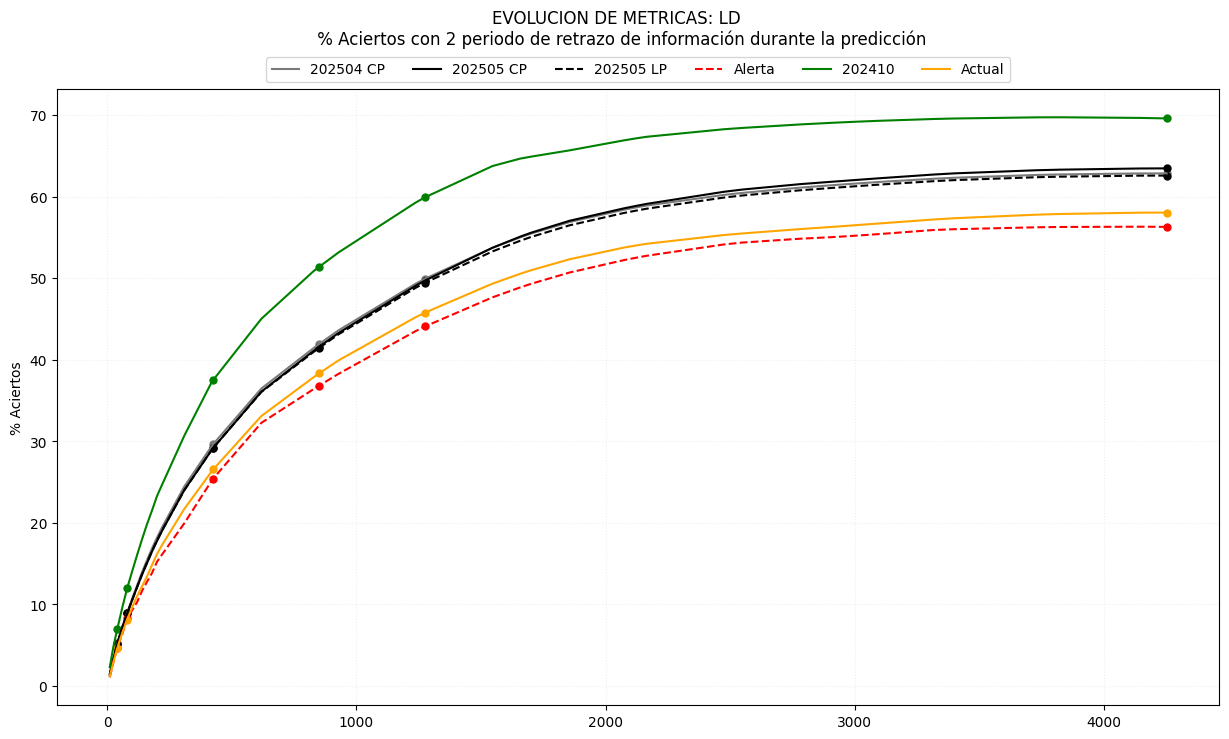

INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Añadiendo las graficas sobre los cambios en los datos
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Iniciando el analisis en los cambios de la estructura de los datos...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Identificando los nodos del ordenamiento que tienen una tendencia decreciente (ventana corta de 2 periodos inferior a la ventana larga de 4 periodos).
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Calculando el cambio porcentual entre el ultimo Backtesting generado vs la ventana corta con 2 periodos...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:El movimiento en el corto plazo corresponde al -8.54% bajo la visual de todo el set de datos, el cual se atribuye a negocio
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Y el movimiento de la metrica atribuible al modelo (en los nodos de ordena

N,40.000,80.000,425.145,850.291,1275.437,4251.458
% Aciertos,-10.37,-8.59,-9.05,-7.84,-7.91,-8.54


INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:% Deterioro sobre los nodos en los cuales se hace seguimiento: 


N,40.000,80.000,425.145,850.291,1275.437
% Aciertos,-10.37,-8.59,-9.05,-7.84,-7.91


INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Evaluando los nodos con tendencia decreciente sobre el comparativo del ultimo Backtesting contra la ventana corta de 2 periodos
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Y ubicando los cortes de deterioro..
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Caida maxima: -10.925% asociado al nodo (Numero de obervacion: N) = 160.0.
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Caida minima: -8.371% asociado al nodo (Numero de obervacion: N) = 100.0.
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:--------
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Calculando el cambio porcentual entre el ultimo Backtesting generado vs el nivel de la alerta permitido y evaluando alertas de deterioro...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:% Deficiencia del modelo: (Backtesting_t /Alert

N,40.0,80.0
Actual vs Alerta,-2.14,-1.85


INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Diagnostico del modelo:
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Alerta Grave/Fuerte por cambio estructural de los datos en el corto plazo
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:esto es porque el ultimo backtesting esta por debajo que las alerta
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Sin modelo el deterioro hubiese sido peor. Revisar las condiciones de mercado y estrategia
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Añadiendo los mensajes sobre los cambios en los datos


In [11]:
pdf_drift,windows_metrics,nodes_target,drift_alert = monitoreo.eval_alertas_cambio_estructural_de_datos(metrics,tickets,params)

In [12]:
drift_alert

True

INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Calculando o añadiendo las graficas sobre el mantenimiento del modelo


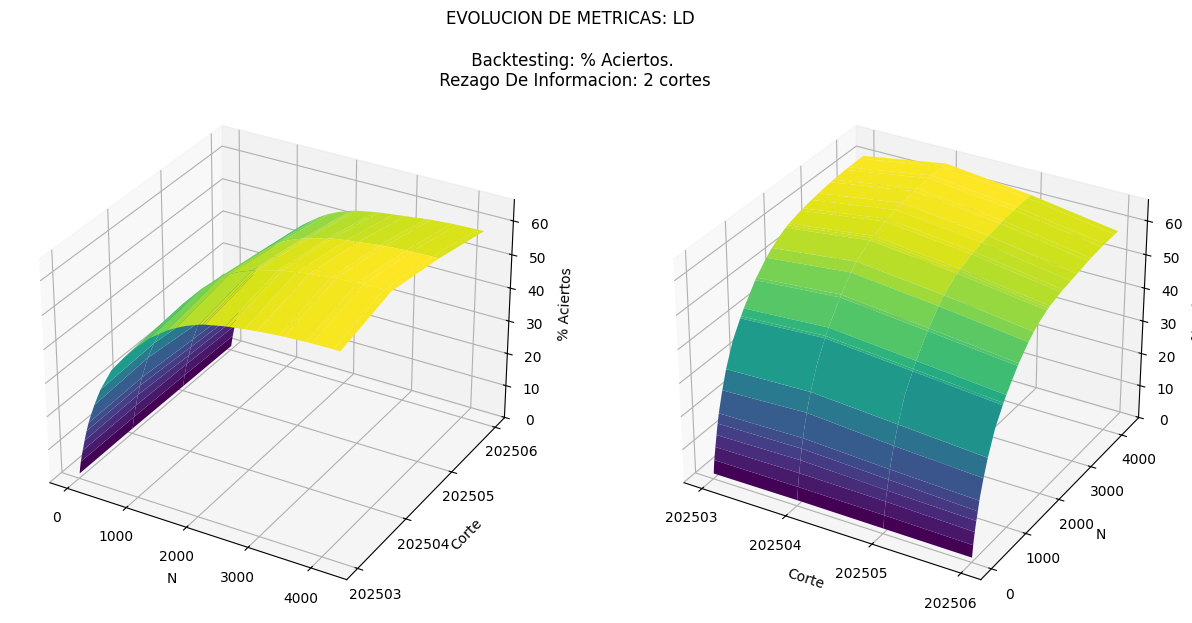

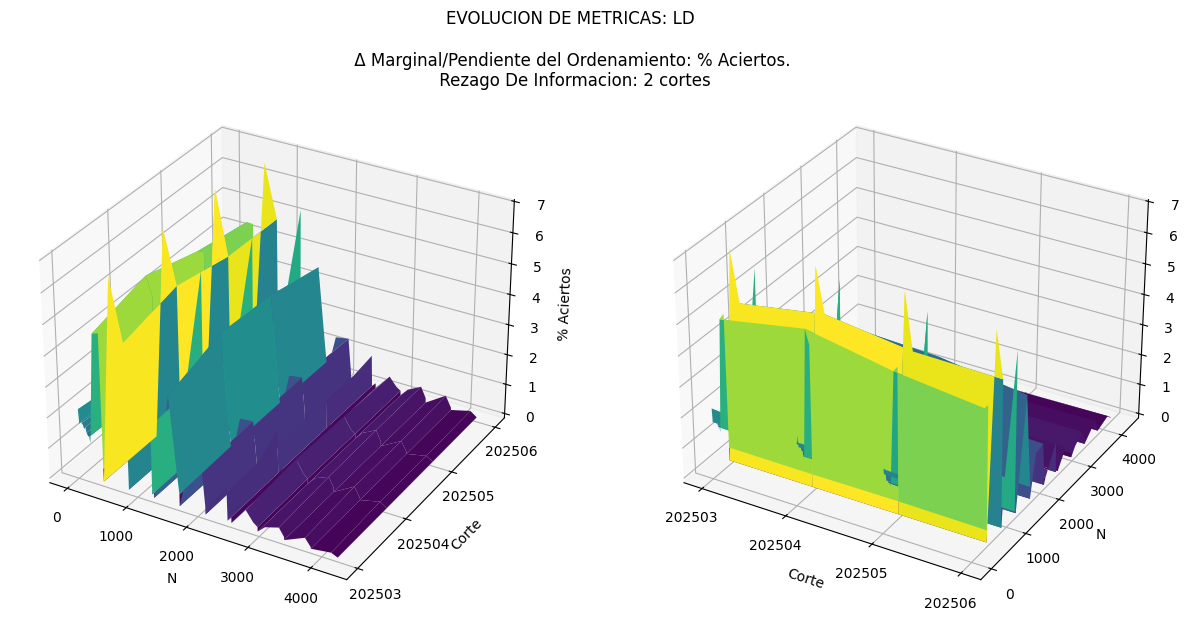

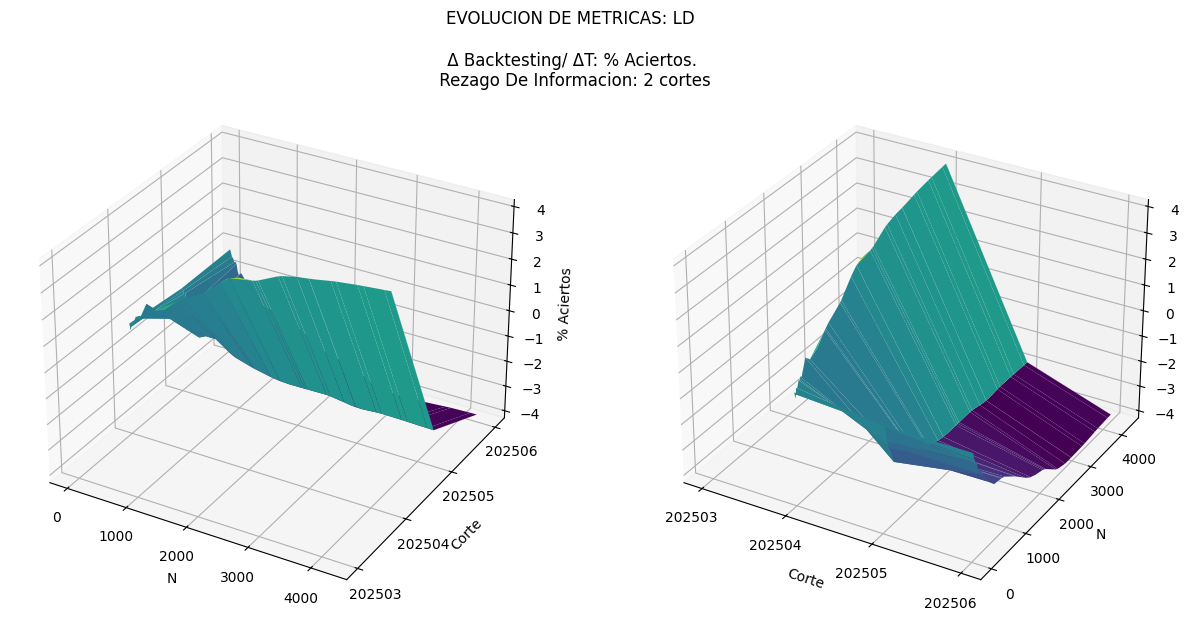

INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Iniciando el calculo de metricas Drawdown...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Comparando metricas actuales vs metricas desde la fecha de producción...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Calculando metricas actuales vs 2,4 periodos ...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Añadiendo los mensajes sobre el mantenimiento del modelo
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Alerta: Drawdown superior al restringido -15% en algunos nodos de la curva de ordenamiento:


% Δ LD,Actual vs Initial,Actual vs μ 2 periods,Actual vs μ 3 periods
N,,,
40.000,-33.978036,-10.370667,-11.121602
80.000,-32.198579,-8.589050,-8.504782
425.145,-29.249627,-9.046759,-9.094869
850.291,-25.416523,-7.838502,-7.529365
1275.437,-23.606404,-7.906389,-7.395198
1700.583,-21.469502,-8.283678,-7.414215
2125.729,-19.558015,-8.246199,-7.334716
2550.874,-18.909965,-8.845553,-7.742788
2976.020,-18.387108,-8.946402,-7.809527


INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Analizando el drawdown en los nodos de interes...
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Alerta: Drawdown superior al restringido -15% en algun nodo de interes
INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:Analizar el reporte para evaluar la recalibracion del modelo


% Δ LD,Actual vs Initial,Actual vs μ 2 periods,Actual vs μ 3 periods
N,,,
40.000,-33.978036,-10.370667,-11.121602
80.000,-32.198579,-8.589050,-8.504782
425.145,-29.249627,-9.046759,-9.094869
850.291,-25.416523,-7.838502,-7.529365
1275.437,-23.606404,-7.906389,-7.395198


In [13]:
pdf_drift_sustainability,sustainability_alert = monitoreo.eval_alertas_drawdown(pdf_drift,windows_metrics,metrics,tickets,nodes_target,params)

In [14]:
sustainability_alert

True

In [15]:
params['estructura_pdf'] = {
            'ruta_monitoreo': f'/home/sagemaker-user/data-bbog-integration-fabrica-personas/notebooks/Monitoreo/',
            'nombre_pdf': f'monitoreo_{prod}.pdf',
            'start_text_cm': 27,
            'margen_sup_inf_cm':2,
            'renglon_cm':1,
            'margen_izq_cm': 2,
            'y_graph_cm': 5, # altura de la posicion de la imagen en la hoja
            'width_graph_cm' : 24, # anchura maxima de la imagen sin distorcion
            'height_graph_cm': 24, # largura maxima de la imagen sin distorcion
            'margen_izq_graph_cm': -1.5,
        }

In [16]:
msj = monitoreo.generar_reporte_pdf(pdf_drift_sustainability,params)

% Δ LD  N\% Δ LD  Actual vs Initial  Actual vs μ 2 periods  \
0         40.000             -33.98                 -10.37   
1         80.000             -32.20                  -8.59   
2        425.145             -29.25                  -9.05   
3        850.291             -25.42                  -7.84   
4       1275.437             -23.61                  -7.91   

% Δ LD  Actual vs μ 3 periods  
0                      -11.12  
1                       -8.50  
2                       -9.09  
3                       -7.53  
4                       -7.40  


INFO:data_bbog_integration_fabrica_personas.pipelines.monitoreo.nodes:PDF generado en: /home/sagemaker-user/data-bbog-integration-fabrica-personas/notebooks/Monitoreo//monitoreo_LD.pdf


In [17]:
msj